In [4]:
from IPython.display import Image
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 


Instructions for updating:
non-resource variables are not supported in the long term


# TensorBoard 

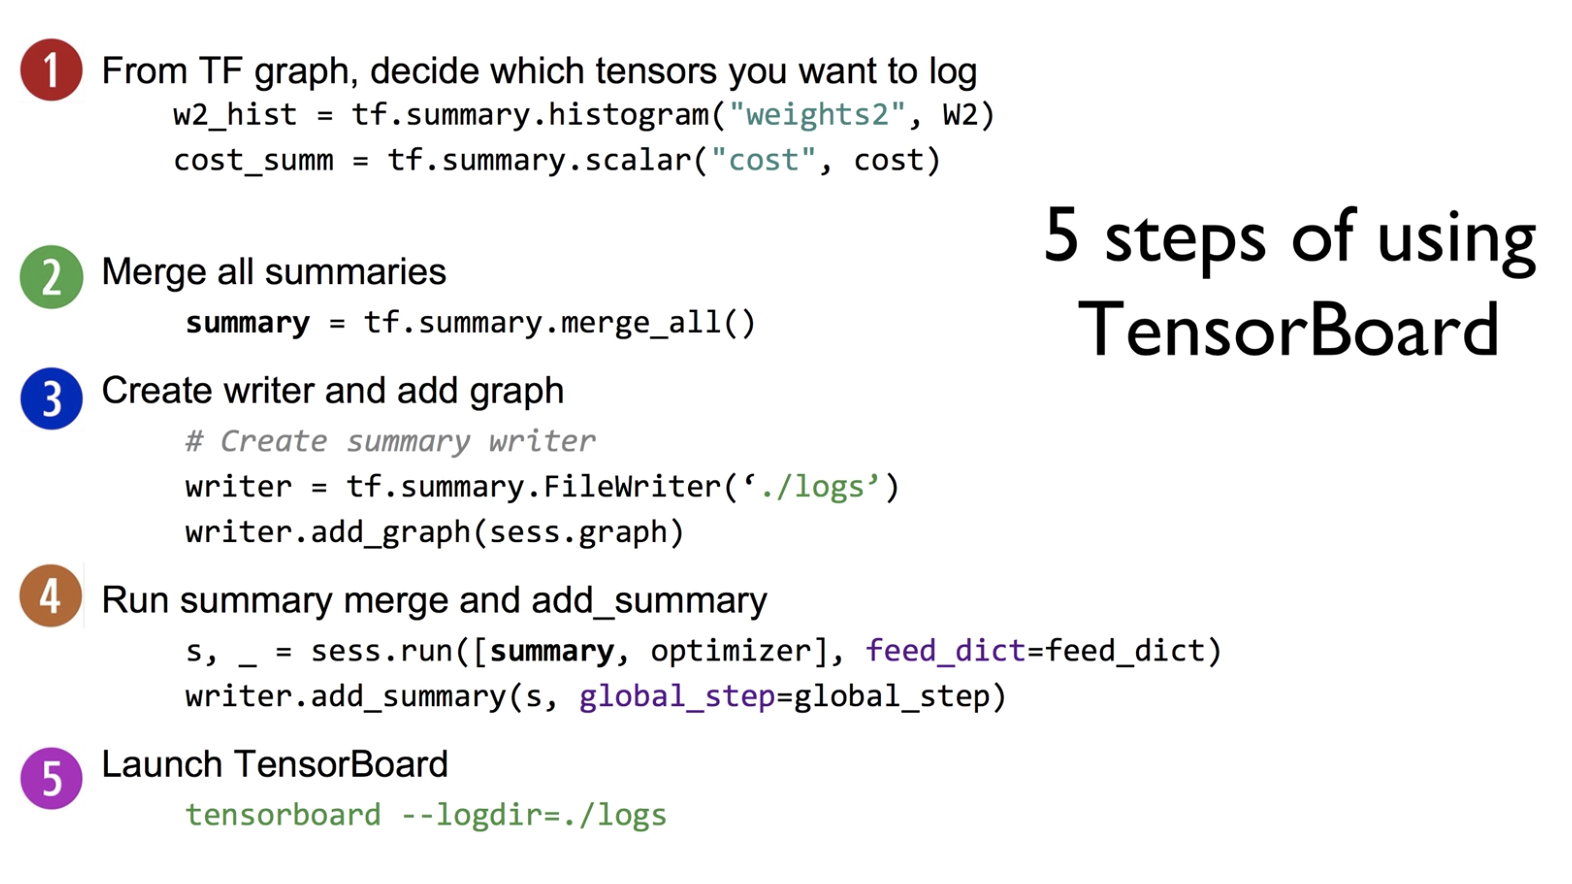

In [2]:
Image("img/TF_Tensorboard.png") # code안에서 나오게 할 때

In [7]:
# Console 명령어
# tensorboard --logdir=./logs/xor_logs_r0_01


In [5]:
tf.set_random_seed(777)  # for reproducibility

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2], name="x")
Y = tf.placeholder(tf.float32, [None, 1], name="y")

with tf.name_scope("Layer1"):
    W1 = tf.Variable(tf.random_normal([2, 2]), name="weight_1")
    b1 = tf.Variable(tf.random_normal([2]), name="bias_1")
    layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

    tf.summary.histogram("W1", W1)
    tf.summary.histogram("b1", b1)
    tf.summary.histogram("Layer1", layer1)


with tf.name_scope("Layer2"):
    W2 = tf.Variable(tf.random_normal([2, 1]), name="weight_2")
    b2 = tf.Variable(tf.random_normal([1]), name="bias_2")
    hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

    tf.summary.histogram("W2", W2)
    tf.summary.histogram("b2", b2)
    tf.summary.histogram("Hypothesis", hypothesis)

# cost/loss function
with tf.name_scope("Cost"):
    cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
    tf.summary.scalar("Cost", cost)

with tf.name_scope("Train"):
    train = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))
tf.summary.scalar("accuracy", accuracy)

# Launch graph
with tf.Session() as sess:
    # tensorboard --logdir=./logs/xor_logs
    merged_summary = tf.summary.merge_all()
    writer = tf.summary.FileWriter("./logs/xor_logs_r0_01")
    writer.add_graph(sess.graph)  # Show the graph

    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        _, summary, cost_val = sess.run(
            [train, merged_summary, cost], feed_dict={X: x_data, Y: y_data}
        )
        writer.add_summary(summary, global_step=step)

        if step % 100 == 0:
            print(step, cost_val)

    # Accuracy report
    h, p, a = sess.run(
        [hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data}
    )
    
    print(f"\nHypothesis:\n{h} \nPredicted:\n{p} \nAccuracy:\n{a}")


0 0.7168676
100 0.6908567
200 0.49870038
300 0.2253619
400 0.12291672
500 0.07914584
600 0.056153916
700 0.042352118
800 0.033301707
900 0.026986767
1000 0.022373727
1100 0.018883027
1200 0.016166918
1300 0.014005077
1400 0.012251835
1500 0.010807454
1600 0.009601374
1700 0.008582564
1800 0.0077132024
1900 0.006964792
2000 0.0063154213
2100 0.0057480196
2200 0.0052491734
2300 0.0048080757
2400 0.0044160266
2500 0.0040659807
2600 0.003752165
2700 0.0034696562
2800 0.003214465
2900 0.0029831931
3000 0.0027729843
3100 0.0025813607
3200 0.0024062647
3300 0.0022458504
3400 0.0020985582
3500 0.0019630534
3600 0.0018381808
3700 0.0017228327
3800 0.0016161547
3900 0.0015173084
4000 0.0014256047
4100 0.0013404004
4200 0.0012611565
4300 0.0011873196
4400 0.0011184708
4500 0.0010541915
4600 0.0009941373
4700 0.0009379648
4800 0.00088534516
4900 0.00083605415
5000 0.00078983756
5100 0.0007464565
5200 0.00070570176
5300 0.00066743896
5400 0.000631429
5500 0.00059755263
5600 0.00056566036
5700 0.000